<a href="https://colab.research.google.com/github/GiovanniBaselli9/Exact-Cover-Problem/blob/main/Progetto_EC_AESD_Giovanni_Baselli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
---
# **ALGORITMI E STRUTTURE DATI - EC**
---
---
---

*A cura di:*

    Giovanni Baselli
    Matricola 718969
    A.A. 2021/2022


---
# **Introduzione**


**Compiti e obiettivi del lavoro**
---
I compiti e gli obiettivi del seguente lavoro sono:
* la progettazione e lo sviluppo di un algoritmo chiamato EC che possa risolvere il problema di Exact Cover, sulla base dello pseudocodice fornito nella documentazione;
* la progettazione e lo sviluppo di un'ulteriore versione dell'algoritmo chiamata EC+, sulla base dello pseudocodice fornito nella documentazione;
* la progettazione e lo sviluppo di un programma per la generazione del file di input;
* la progettazione e lo sviluppo di un programma per effettuare un confronto tra le uscite calcolate dalle due versioni dell'algoritmo.

\\

Questo *notebook* ha lo scopo di:
* fornire una prima spiegazione del problema che si vuole risolvere;
* fornire le soluzioni adottate per risolvere tale problema, seguendo la struttura ordinata e sequenziale delle celle di Colab;
* permettere l'esecuzione diretta del codice fornito e la visualizzazione dei risultati (file generati, grafici, ecc.);
* raccogliere in un unico luogo tutte le soluzioni software richieste dal progetto.

\\

**Maggiori dettagli riguardo al progetto complessivo**, quali gli pseudocodici seguiti, i concetti chiave, le scelte implementative e quant'altro, **sono reperibili nella documentazione al seguente link:** https://drive.google.com/file/d/12af5GHGguwIsPbW9jaVrlJjj-3kKhZpD/view?usp=share_link




**Problema EC (Exact Cover)**
---
Il problema di *copertura esatta* o *Exact Cover* è un problema di ottimizzazione combinatoria NP-completo ed è uno dei 21 problemi di tipo NP-completo di Karp.


Esso coinvolge i seguenti tre insiemi:

* **M** = dominio, definito come un insieme di elementi distinti (che, in questa soluzione, sono rappresentati come coppie lettera-cifra araba).
Ogni elemento di M è univocamente identificato da un indice intero appartenente all'intervallo [1..|M|].

* **N** = collezione finita di insiemi finiti (distinti) dove gli elementi di ogni insieme appartengono al dominio M.
Ogni elemento di N è univocamente identificato da un indice intero appartenente all'intervallo [1..|N|].

* **Partizioni** = tutte le partizioni (o coperture esatte) di M dove ciascuna parte è un insieme della collezione N.
Una partizione di M è un (sotto)insieme della collezione N costituito da insiemi tutti reciprocamente disgiunti e tali che la loro unione sia M.

**Esempio:**

    M = {a1, b2, b3, c4, a4, d2}

    N = { {a1, b2},
          {a1, b3, a4},
          {b2, c4, d2},
          {b3, a4, d2},
          {c4},
          {b2, c4, b3, a1, a4, d2} 
          {a1, b3} }
    

    Partizioni = { {{a1, b2}, {b3, a4, d2}, {c4}}, 
                   {{a1, b3, a4}, {b2, c4, d2}},
                   {{b2, c4, b3, a1, a4, d2}} }
    
    |M| = 6
    |N| = 7
    |Partizioni| = 3

Generalmente, il problema prevede:

* ***Input***: collezione N, i cui (sotto)insiemi sono composti da elementi del dominio M

* ***Output***: insieme delle Partizioni

**Input**
---

Nel caso in esame, l'**input** viene rappresentato come una **matrice A** di dimensione |N| x |M|, dove il valore del componente *a(i,j)* è:
- **1** => se l'elemento di indice *j* del dominio M  appartiene all'insieme di indice *i* della collezione N;
- **0** => altrimenti.


Considerando l'**esempio** precedente, la matrice A relativa è la seguente: ogni riga corrisponde ad un insieme della collezione N, mentre ogni colonna ad un elemento del dominio M.

\\
\begin{equation*}
A_{|N|\times |M|} =
\begin{bmatrix}
1 & 1 & 0 & 0 & 0 & 0\\
1 & 0 & 1 & 0 & 1 & 0\\
0 & 1 & 0 & 1 & 0 & 1\\
0 & 0 & 1 & 0 & 1 & 1\\
0 & 0 & 0 & 1 & 0 & 0\\
1 & 1 & 1 & 1 & 1 & 1\\
1 & 0 & 1 & 0 & 0 & 0\\
\end{bmatrix}
\end{equation*}

**Output**
---
Sempre per il caso in esame, l'**output** rappresentata le partizioni attraverso l'**insieme COV**, in cui ciascuna partizione è definita come insieme di identificatori, uno per ciascun insieme appartenente alla collezione N che fa parte della partizione.

Dato l'**esempio** precedente, le partizioni saranno rappresentate in questo modo:

    Partizioni = { {{a1, b2}, {b3, a4, d2}, {c4}}, 
                   {{a1, b3, a4}, {b2, c4, d2}},
                   {{b2, c4, b3, a1, a4, d2}} }

    COV = { {1, 4, 5},
            {2, 3},
            {6} }

**Matrice di compatibilità**
---

L'approccio proposto utilizza il concetto di **matrice di compatibilità B**, ovvero una matrice simmetrica |N|x|N| in cui *b(i,j)* assume il valore **1** se valgono contemporaneamente:

* i != j
* A[i] ∩ A[j] = ∅
* A[i] ∪ A[j] != M

Se anche solo una delle condizioni non è valida, *b(i,j)* assume il valore **0**.

L'algoritmo EC produce incrementalmente la matrice di compatibilità individuando così gli insiemi compatibili, ovvero A[i] e A[j] tali per cui *b(i,j)*=1, ai quali sarà possibile aggregare ulteriori insiemi al fine di formare delle partizioni. 


Nell'**esempio**, la matrice di compatibilità corrispondente è:

\\
\begin{equation*}
B_{|N|\times |N|} =
\begin{bmatrix}
0 & 0 & 0 & 1 & 1 & 0 & 0\\
 & 0 & 0 & 0 & 1 & 0 & 0\\
 &  & 0 & 0 & 0 & 0 & 1\\
 &  &  & 0 & 1 & 0 & 0\\
 &  &  &  & 0 & 0 & 1\\
 &  &  &  &  & 0 & 0\\
 &  &  &  &  &  & 0\\
\end{bmatrix}
\end{equation*}

---
---
#Librerie di utilità

L'esecuzione di questa cella è necessaria per il corretto funzionamento di tutti i programmi disponibili all'interno del notebook, in quanto permette di importare le librerie di utilità utilizzate.

In [ ]:
import string
import sys
import random as r
import timeit
import shutil as sh
import numpy as np
from scipy.special import binom as bin
from scipy.sparse import lil_matrix as lilmat
import signal
import os
import matplotlib.pyplot as plt
from google.colab import files

---
# Funzioni di utilità
In questa sezione sono presenti le funzioni di utilità usate all'interno di questo progetto.

In [ ]:
def cardDistribution(lis, indeX):
  if not 0 <= (indeX-1) < len(lis):
    while len(lis)<indeX:
        lis.append(0)
  lis[indeX-1]+=1

In [ ]:
def handle_timeout(signum, frame):
    raise TimeoutError

In [ ]:
def handle_interrupt(signal, frame):
  print('\nkeyboardInterrupt detected!')
  raise KeyboardInterrupt

---
---
# Generazione del file di input

In questa sezione viene mostrata la generazione di un file '***input.txt***' di input per gli algoritmi EC ed EC+.

Oltre al file sopracitato, viene creato un ulteriore file '***indexes.txt***' in cui è possibile consultare la lista indicizzata degli insiemi contenuti nella collezione N, utile ai fini della comprensione del file di output generato dagli algoritmi EC ed EC+.

Entrambi i file vengono scaricati automaticamente al termine dell'esecuzione. Tuttavia, essi sono reperibili per la visualizzazione diretta anche dalla sezione "File" di questo notebook in Colab.

In [ ]:
start_time = timeit.default_timer()

lengthM = r.randint(5,12)
M = set()
while len(M)<lengthM:
  M.add(r.choice(string.ascii_lowercase)+str(r.randint(1,9)))

max_comb = 0
for k in range(1,lengthM):
  max_comb += bin(lengthM, k)
lengthN = r.randint(1, round(max_comb))
N = set()
lmin, lmax = round(lengthN/3), lengthN
while len(N)<lengthN:
  if len(N)<r.randint(lmin, lmax): N.add(frozenset(r.sample(M, k=r.randint(round(lengthM/2), lengthM))))
  else: N.add(frozenset(r.sample(M, k=r.randint(1,round(lengthM/2)))))

M = tuple(M)
N = tuple([tuple(x) for x in N])
strN = str(N).replace('(', '{').replace(')','}').replace(',}','}')

cardsum=0
NcardDistrib=[0]*lengthM
for elem in N:
  index=len(elem)
  cardsum+=index
  cardDistribution(NcardDistrib,index)
  
avgN=round(cardsum/len(N), 4)

with open('input.txt', 'w') as f:
    f.write("".join([
        ";;; M = {", ', '.join(M), "}\n",
        ";;; N = ", strN.replace('\'',''), "\n\n",
        ";;; A =\n"]))
    
    for i in range(lengthN):
      A_row=[1 if (M[j] in N[i]) else 0 for j in range(lengthM)]
      f.write(str(A_row).replace('[','').replace(']','').replace(',',''))
      if i!=lengthN-1: f.write(" -\n")

    f.write("".join(["\n\n;;; Cardinality of domain M: ", str(lengthM),
            "\n;;; M indexes from 1 to ", str(lengthM),
            "\n;;; Cardinality of collection N: ", str(lengthN),
            "\n;;; N indexes from 1 to ", str(lengthN),
            "\n;;; Average cardinality for sets in N (avgN): ", str(avgN),
            "\n;;; Aggregate index (avgN/|M|): ", str(round(avgN/lengthM,4))]))
    for i in range(lengthM):
      f.write("\n;;; Sets in N with cardinality "+str(i+1)+": "+str(NcardDistrib[i])+" => "+str(round(NcardDistrib[i]/lengthN*100,3))+"%")
    execution_time = timeit.default_timer()-start_time
    f.write("\n;;; Time to build and save A: "+str(execution_time)+"s")
    f.close()
    
sh.copy2('input.txt', 'indexes.txt')
with open('indexes.txt', 'a') as f:
 f.write("\n\n;;; M indexes:")
 for i in range(lengthM):
   f.write("\n;;; "+str(i+1)+"->"+str(M[i]))
 f.write("\n\n;;; N indexes:")
 for i in range(lengthN):
   f.write("\n;;; "+str(i+1)+"->"+str(N[i]).replace('(', '{').replace(')','}').replace('\'', '').replace(',}','}'))
 f.close()

---
Visualizzazione dei risultati ottenuti:

In [ ]:
print("M = {"+', '.join(M)+"}\n"+
      "N = "+strN.replace('\'','')+"\n"+
      "\nCardinality of domain M: "+str(lengthM)+
      "\nM indexes from 1 to "+str(lengthM)+
      "\nCardinality of collection N: "+str(lengthN)+
      "\nN indexes from 1 to "+str(lengthN)+
      "\n\nAverage cardinality for sets in N: "+str(avgN)+
      "\nAggregate index (avgN/|M|): "+str(round(avgN/lengthM,4)))

for i in range(lengthM):
      print("Sets in N with cardinality "+str(i+1)+": "+str(NcardDistrib[i])+" => "+str(round(NcardDistrib[i]/lengthN*100,3))+"%")

print("\n;;; Time to build and save A: "+str(execution_time)+"s")

M = {q9, d9, z9, o7, q3, i2, e6}
N = {{q9, d9, i2, z9}, {i2, q3, e6}, {q9, d9, q3, e6}, {q9, d9, z9, o7, i2}, {d9}, {q3, z9}, {q9, q3, o7}, {q9, z9, q3, i2, e6}, {q9, q3, z9, e6}, {q9, q3}, {d9, q3, z9, e6}, {q9, d9, z9, o7, q3, i2}, {d9, i2, e6, o7}, {i2, q3, z9, o7}, {z9, o7}, {z9, o7, q3, i2, e6}, {i2, z9, o7}, {i2, q3, o7}, {q3, o7}, {q9, d9, z9, o7, q3, i2, e6}, {d9, i2, e6}, {d9, e6}, {d9, e6, o7}, {q9, i2, e6, q3}, {q9, i2, e6}, {q9, e6}, {q9, i2, z9, o7}, {q9, d9, z9, o7, i2, e6}, {d9, q3, e6, o7}, {q9, d9, z9, e6}, {q9, d9, z9, q3, i2}, {q9, d9, q3}, {i2, q3, z9, e6}, {z9, e6}, {q9, z9}, {q9, d9, z9, q3, i2, e6}, {q9, i2, q3, o7}, {d9, z9, o7, q3, i2}, {q9, i2, z9, q3}, {q9, d9, z9, o7, q3, e6}, {d9, q3, z9, i2}, {d9, z9}, {q9, z9, o7, q3, i2}, {d9, o7, q3, i2, e6}, {q3}, {q9, d9, o7, q3, i2}, {i2, z9, e6, o7}, {q9}, {i2, q3, e6, o7}, {q9, d9}, {q9, d9, z9, o7, e6}, {q9, d9, q3, i2, e6}, {q9, d9, z9, o7}, {e6, o7}, {o7}, {z9}, {i2}, {q9, q3, e6}, {q9, d9, i2, o7}, {q9, d9, z9,

---
Download dei file '*input.txt*' e '*indexes.txt*'.

In [ ]:
files.download("./input.txt")
files.download("./indexes.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
---
# Lettura file di testo

Il file .txt di input è comune per EC ed EC+, pertanto il processo di lettura è unico e i dati raccolti sono utilizzati da entrambi gli algoritmi.

In [ ]:
try:
  with open("input.txt", "r") as f:  
      A_read = [line for line in f if (";;;" not in line and line.strip())]
      f.close()

  stop=len(A_read)
  for i in range(len(A_read)):
    A_read[i]=A_read[i].split()

    if "-" in A_read[i]: 
      A_read[i].remove("-")

    if i==0:
      minmaxlen=len(A_read[0])

    try:
      A_read[i]=tuple([int(elem) for elem in A_read[i] if (int(elem)==1 or int(elem)==0)])
      if len(A_read[i])!=minmaxlen:
          print("Error in building A: rows have not the same length.")
          stop=i
          break
      elif A_read[i].count(1)==0:
        print("Error in building A: rows contain an all zeros row.")
        stop=i
        break
    except ValueError:
      print("Error in building A: rows in file contain not integer elements.")
      stop=0
      break
  

  if(stop!=len(A_read)):
    print("A matrix not imported.")
    del A_read
  else:
    A_read=tuple(A_read)
    print(A_read)

except FileNotFoundError:
  print("There's no 'input.txt' file.")

((1, 1, 1, 0, 0, 1, 0), (0, 0, 0, 0, 1, 1, 1), (1, 1, 0, 0, 1, 0, 1), (1, 1, 1, 1, 0, 1, 0), (0, 1, 0, 0, 0, 0, 0), (0, 0, 1, 0, 1, 0, 0), (1, 0, 0, 1, 1, 0, 0), (1, 0, 1, 0, 1, 1, 1), (1, 0, 1, 0, 1, 0, 1), (1, 0, 0, 0, 1, 0, 0), (0, 1, 1, 0, 1, 0, 1), (1, 1, 1, 1, 1, 1, 0), (0, 1, 0, 1, 0, 1, 1), (0, 0, 1, 1, 1, 1, 0), (0, 0, 1, 1, 0, 0, 0), (0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 0, 1, 0), (0, 0, 0, 1, 1, 1, 0), (0, 0, 0, 1, 1, 0, 0), (1, 1, 1, 1, 1, 1, 1), (0, 1, 0, 0, 0, 1, 1), (0, 1, 0, 0, 0, 0, 1), (0, 1, 0, 1, 0, 0, 1), (1, 0, 0, 0, 1, 1, 1), (1, 0, 0, 0, 0, 1, 1), (1, 0, 0, 0, 0, 0, 1), (1, 0, 1, 1, 0, 1, 0), (1, 1, 1, 1, 0, 1, 1), (0, 1, 0, 1, 1, 0, 1), (1, 1, 1, 0, 0, 0, 1), (1, 1, 1, 0, 1, 1, 0), (1, 1, 0, 0, 1, 0, 0), (0, 0, 1, 0, 1, 1, 1), (0, 0, 1, 0, 0, 0, 1), (1, 0, 1, 0, 0, 0, 0), (1, 1, 1, 0, 1, 1, 1), (1, 0, 0, 1, 1, 1, 0), (0, 1, 1, 1, 1, 1, 0), (1, 0, 1, 0, 1, 1, 0), (1, 1, 1, 1, 1, 0, 1), (0, 1, 1, 0, 1, 1, 0), (0, 1, 1, 0, 0, 0, 0), (1, 0, 1, 1, 1, 1, 0), (0, 1, 0, 

---
#Implementazione algoritmo **EC**
Risoluzione del problema di Exact Cover (EC) nella prima versione dell'algoritmo.

Questa sezione permette la generazione di un file '***output.txt***' contenente le partizioni individuate dall'algoritmo base, scaricato automaticamente al termine dell'esecuzione. Esso è reperibile per la visualizzazione diretta anche dalla sezione "File" del notebook in Colab.

In [ ]:
f_out = open('output.txt', 'w+')
f_out.write("".join([';;; Cardinality of domain M: ', str(len(A_read[0])),
             '\n;;; Cardinality of collection N: ', str(len(A_read)),
             '\n\n;;; Partitions EC: \n']))

88

In [ ]:
B = lilmat((len(A_read),len(A_read)),dtype=int)
visited = 0
tot_nodes = 2**len(A_read)-1
COVcard=0
COVcardDistrib=[]
NcardSum=0

In [ ]:
def ESPLORA(A, I, U, Inter):
  global visited, COVcard
  for k in Inter[0]:
    visited+=1
    Itemp=list(I)
    Itemp.append(k+1)
    Utemp=[1 if (U[col]==1 or A[k][col]==1) else 0 for col in range(len(A[i]))]
    if Utemp.count(0)==0:
          f_out.write("".join(["{", str(sorted(Itemp)).replace('[', '').replace(']',''), "} => cardinality: ", str(len(Itemp)),"\n"]))
          COVcard+=1
          cardDistribution(COVcardDistrib,len(Itemp))
    else:
      Intertemp_index = []
      Intertemp = []
      for K in range(k):
        if Inter[1][K]==1 and B[K,k]==1:
          Intertemp_index.append(K)
          Intertemp.append(1)
        else: Intertemp.append(0)
      if Intertemp_index:
        ESPLORA(A,Itemp,Utemp,[Intertemp_index,Intertemp])

In [ ]:
def EC(A):
  global visited, COVcard, NcardSum
  for i in range(len(A)):
    NcardSum+=A[i].count(1)
    if A[i].count(1)==0:
      continue
    if A[i].count(0)==0:
      f_out.write("".join(["{", str(i+1), "} => cardinality: 1\n"]))
      visited+=1
      COVcard+=1
      cardDistribution(COVcardDistrib,1)
      continue
    
    for j in range(i):
      visited+=1
      flag=True
      for col in range(len(A[i])):
        if A[i][col]==1 and A[j][col]==1:
          flag=False
          break
      if flag:
        I=[i+1,j+1]
        U=[1 if (A[i][col]==1 or A[j][col]==1) else 0 for col in range(len(A[i]))]
        if U.count(0)==0:
          f_out.write("".join(["{", str(sorted(I)).replace('[', '').replace(']',''), "} => cardinality: 2\n"]))
          COVcard+=1
          cardDistribution(COVcardDistrib,2)
        else:
          B[j,i]=1
          Inter_index=[]
          Inter=[]
          for r in range(j):
            if B[r,i]==1 and B[r,j]==1:
              Inter_index.append(r)
              Inter.append(1)
            else: Inter.append(0)
          if Inter_index:
            ESPLORA(A,I,U,[Inter_index,Inter])

In [ ]:
signal.signal(signal.SIGALRM, handle_timeout)
signal.signal(signal.SIGINT, handle_interrupt)
signal.alarm(3600)
ended="no"

try:
    start_time = timeit.default_timer()
    EC(A_read)
    execution_time = timeit.default_timer()-start_time
    f_out.write("\n;;; Time to create partitions: "+str(execution_time)+"s\n")
    ended="yes"
except TimeoutError:
    execution_time = timeit.default_timer()-start_time
    print("Time is up. Partitioning in EC has been stopped.")
    f_out.write("\n;;; Time is up. Partitioning in EC has been stopped after "+str(execution_time)+"s\n")
except KeyboardInterrupt:
    execution_time = timeit.default_timer()-start_time
    print("Partitioning in EC has been stopped by the user.")
    f_out.write("\n;;; Partitioning in EC has been stopped by the user after "+str(execution_time)+"s\n")
finally:
    signal.alarm(0)

f_out.write("\n;;; Number of partitions produced by EC: "+str(COVcard))
for i in range(len(COVcardDistrib)):
    f_out.write("\n;;; Partitions with cardinality "+str(i+1)+": "+str(COVcardDistrib[i])+" => "+str(round(COVcardDistrib[i]/COVcard*100,3))+"%")

f_out.write("\n\n;;; Number of visited nodes: "+str(visited))
try:
  dimTotNodes=len(str(tot_nodes))
  if dimTotNodes>12:
    f_out.write("\n;;; Number of possible nodes: > 1e"+str(dimTotNodes-1)+"\n;;; Exact number: "+str(tot_nodes))
    f_out.write("\n;;; Percentage of visited nodes: around 0%\n;;; Exact percentage: "+str(visited/tot_nodes*100)+"%\n")
  else:
    f_out.write("\n;;; Number of possible nodes: "+str(tot_nodes))
    f_out.write("\n;;; Percentage of visited nodes: "+str(visited/tot_nodes*100)+"%\n")
except ValueError:
    f_out.write("\n;;; Number of total nodes is too high, so it can't be printed.\n;;; Percentage of visited nodes: around 0%\n")
finally:
  avgN=round(NcardSum/len(A_read), 4)
  f_out.write("\n;;; Average cardinality for sets in N (avgN): "+str(avgN))
  f_out.write("\n;;; Aggregate index (avgN/|M|): "+str(round(avgN/len(A_read[0]),4))+"\n")
  f_out.close()

In [ ]:
EC_data_for_comparison={
    "Execution ended": ended,
    "M cardinality": len(A_read[0]),
    "N cardinality": len(A_read),
    "Aggregate index": round(avgN/len(A_read[0]),4),
    "visited nodes": visited,
    "COV cardinality": COVcard,
    "COV distribution": COVcardDistrib,
    "execution time": execution_time
}

In [ ]:
EC_data_for_comparison

{'Execution ended': 'yes',
 'M cardinality': 7,
 'N cardinality': 73,
 'Aggregate index': 0.5342,
 'visited nodes': 3317,
 'COV cardinality': 158,
 'COV distribution': [1, 22, 55, 51, 25, 4],
 'execution time': 0.03899125599998854}

---
Download del file di output di EC.

In [ ]:
files.download("./output.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
# Implementazione algoritmo **EC+**
Risoluzione del problema di Exact Cover (EC) nella seconda versione dell'algoritmo.
 
Per gli aggregati di insiemi, in questo caso, non si controlla se l'unione di tali insiemi sia uguale al dominio M, ma piuttosto che la somma delle cardinalità degli insiemi coincida con la cardinalità di M.

Questa sezione permette la generazione di un file '***output2.txt***' contenente le partizioni individuate dall'algoritmo plus, scaricato automaticamente al termine dell'esecuzione. Esso è reperibile per la visualizzazione diretta anche dalla sezione "File" del notebook in Colab.

In [ ]:
f_out2 = open('output2.txt', 'w+')
f_out2.write("".join([';;; Cardinality of domain M: ', str(len(A_read[0])),
             '\n;;; Cardinality of collection N: ', str(len(A_read)), 
             '\n\n;;; Partitions EC+: \n']))

89

In [ ]:
B = lilmat((len(A_read),len(A_read)),dtype=int)
visited = 0
tot_nodes = 2**len(A_read)-1
COVcard = 0
COVcardDistrib = []
NcardSum=0
NcardDistrib = [0]*len(A_read[0])

In [ ]:
def ESPLORA_PLUS(A, I, cardU, Inter):
  global visited, COVcard
  for k in Inter[0]:
    visited+=1
    Itemp=list(I)
    Itemp.append(k+1)
    cardtemp=cardU+A[k].count(1)
    if cardtemp==len(A[0]):
          f_out2.write("".join(["{", str(sorted(Itemp)).replace('[', '').replace(']',''), "} => cardinality: ", str(len(Itemp)), "\n"]))
          COVcard+=1
          cardDistribution(COVcardDistrib,len(Itemp))
    else:
      Intertemp_index = []
      Intertemp = []
      for K in range(k):
        if Inter[1][K]==1 and B[K,k]==1:
          Intertemp_index.append(K)
          Intertemp.append(1)
        else: Intertemp.append(0)
      if Intertemp_index:
        ESPLORA_PLUS(A,Itemp,cardtemp,[Intertemp_index,Intertemp])

In [ ]:
def EC_PLUS(A):
  global visited, COVcard, NcardSum
  for i in range(len(A)):
    cardi=A[i].count(1)
    NcardSum+=cardi
    if cardi==0:
      continue
    if cardi==len(A[0]):
      f_out2.write("".join(["{", str(i+1), "} => cardinality: 1\n"]))
      visited+=1
      COVcard+=1
      cardDistribution(COVcardDistrib,1)
      cardDistribution(NcardDistrib,len(A[0]))
      continue
    
    cardDistribution(NcardDistrib,cardi)
    for j in range(i):
      visited+=1
      flag=True
      for col in range(len(A[i])):
        if A[i][col]==1 and A[j][col]==1:
          flag=False
          break
      if flag:
        I=[i+1,j+1]
        cardU=cardi+A[j].count(1)
        if cardU==len(A[i]):
          f_out2.write("".join(["{", str(sorted(I)).replace('[', '').replace(']',''), "} => cardinality: 2\n"]))
          COVcard+=1
          cardDistribution(COVcardDistrib,2)
        else:
          B[j,i]=1
          Inter_index=[]
          Inter=[]
          for r in range(j):
            if B[r,i]==1 and B[r,j]==1:
              Inter_index.append(r)
              Inter.append(1)
            else: Inter.append(0)
          if Inter_index:
            ESPLORA_PLUS(A,I,cardU,[Inter_index,Inter])

In [ ]:
signal.signal(signal.SIGALRM, handle_timeout)
signal.alarm(3600)
ended="no"

try:
    start_time = timeit.default_timer()
    EC_PLUS(A_read)
    execution_time = timeit.default_timer()-start_time
    f_out2.write("\n;;; Time to create partisions: "+str(execution_time)+"s\n")
    ended="yes"
except TimeoutError:
    execution_time = timeit.default_timer()-start_time
    print("Time is up. Partitioning in EC+ has been stopped.")
    f_out2.write("\n;;; Time is up. Partitioning in EC+ has been stopped after "+str(execution_time)+"s\n")
except KeyboardInterrupt:
    execution_time = timeit.default_timer()-start_time
    print("Partitioning in EC+ has been stopped by the user.")
    f_out2.write("\n;;; Partitioning in EC+ has been stopped by the user after "+str(execution_time)+"s\n")
finally:
    signal.alarm(0)

f_out2.write("\n;;; Number of partitions produced by EC+: "+str(COVcard))
for i in range(len(COVcardDistrib)):
    f_out2.write("\n;;; Partitions with cardinality "+str(i+1)+": "+str(COVcardDistrib[i])+" => "+str(round(COVcardDistrib[i]/COVcard*100,3))+"%")
        
f_out2.write("\n\n;;; Number of visited nodes: "+str(visited))
try:
  dimTotNodes=len(str(tot_nodes))
  if dimTotNodes>12:
    f_out2.write("\n;;; Number of possible nodes: > 1e"+str(dimTotNodes-1)+"\n;;; Exact number: "+str(tot_nodes))
    f_out2.write("\n;;; Percentage of visited nodes: around 0%\n;;; Exact percentage: "+str(visited/tot_nodes*100)+"%\n")
  else:
    f_out2.write("\n;;; Number of possible nodes: "+str(tot_nodes))
    f_out2.write("\n;;; Percentage of visited nodes: "+str(visited/tot_nodes*100)+"%\n")
except ValueError:
  f_out2.write("\n;;; Number of total nodes is too high, so it can't be printed.\n;;; Percentage of visited nodes: around 0%\n")

avgN=round(NcardSum/len(A_read), 4)
f_out2.write("\n;;; Average cardinality for sets in N (avgN): "+str(avgN))
f_out2.write("\n;;; Aggregate index (avgN/|M|): "+str(round(avgN/len(A_read[0]),4)))
for i in range(len(NcardDistrib)):
    f_out2.write("\n;;; Sets in N with cardinality "+str(i+1)+": "+str(NcardDistrib[i])+" => "+str(round(NcardDistrib[i]/len(A_read)*100,3))+"%")

f_out2.close()

In [ ]:
ECplus_data_for_comparison={
    "Execution ended": ended,
    "M cardinality": len(A_read[0]),
    "N cardinality": len(A_read),
    "Aggregate index": round(avgN/len(A_read[0]),4),
    "visited nodes": visited,
    "COV cardinality": COVcard,
    "COV distribution": COVcardDistrib,
    "execution time": execution_time
}

In [ ]:
ECplus_data_for_comparison

{'Execution ended': 'yes',
 'M cardinality': 7,
 'N cardinality': 73,
 'Aggregate index': 0.5342,
 'visited nodes': 3317,
 'COV cardinality': 158,
 'COV distribution': [1, 22, 55, 51, 25, 4],
 'execution time': 0.03453532399998949}

---
Download del file di output di EC+.

In [ ]:
files.download("./output2.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Confronto diretto
Questa sezione è utile ad effettuare un controllo tra la soluzione fornita da EC ed EC+ rispetto allo stesso input.

Si è scelto di usare due modalità:

1. costruzione di una tabella che racchiude tutte i valori delle variabili principalmente utilizzate, sia per EC che per EC+, e li mette a confronto. Questa tabella riassuntiva viene scritta, in aggiunta, in un file di testo '***comparison.txt***'.

2. confronto diretto dei file in uscita da EC ed EC+. Dovendo, i due file, fornire esattamente gli stessi risultati, grazie alla lettura degli stessi vengono segnalate tutte le righe di testo differenti e, quindi, i relativi valori. Ciò è utile a verificare soprattutto le incongruenze dal punto di vista delle partizioni trovare. Tuttavia, tale modalità può risultare lenta in caso di file di output molto grandi.

---
1. Costruzione della tabella di confronto. Essa verrà stampata nel file '*comparison.txt*'.

In [ ]:
with open('comparison.txt', 'w') as f:

  line="------------------"
  print(f'{"Variable": <20}{"EC": <20}{"EC+": <20}{"Different?": <20}')
  f.write(f'{"Variable": <20}{"EC": <20}{"EC+": <20}{"Different?": <20}'+"\n")
  print(f'{line: <20}{line: <20}{line: <20}{line: <20}')
  f.write(f'{line: <20}{line: <20}{line: <20}{line: <20}'+"\n")
  print(f'{"execution ended": <20}{EC_data_for_comparison["Execution ended"]: <20}{ECplus_data_for_comparison["Execution ended"]: <20}{("yes" if ECplus_data_for_comparison["Execution ended"]!=EC_data_for_comparison["Execution ended"] else "no"): <20}')
  f.write(f'{"execution ended": <20}{EC_data_for_comparison["Execution ended"]: <20}{ECplus_data_for_comparison["Execution ended"]: <20}{("yes" if ECplus_data_for_comparison["Execution ended"]!=EC_data_for_comparison["Execution ended"] else "no"): <20}'+"\n")

  refuse=["COV distribution", "Execution ended", "execution time", "memory usage"]
  for k, v in EC_data_for_comparison.items():
    if k not in refuse: 
      print(f'{k: <20}{round(v,5): <20}{round(ECplus_data_for_comparison[k],6): <20}{("no" if v==ECplus_data_for_comparison[k] else "yes ["+str(round(v-ECplus_data_for_comparison[k], 6))+"]"): <20}')
      f.write(f'{k: <20}{round(v,5): <20}{round(ECplus_data_for_comparison[k],6): <20}{("no" if v==ECplus_data_for_comparison[k] else "yes ["+str(round(v-ECplus_data_for_comparison[k], 6))+"]"): <20}'+"\n")

  print(f'{"execution time": <20}{str(round(EC_data_for_comparison["execution time"],6))+" s": <20}{str(round(ECplus_data_for_comparison["execution time"],6))+" s": <20}{("no" if EC_data_for_comparison["execution time"]==ECplus_data_for_comparison["execution time"] else "yes ["+str(round(EC_data_for_comparison["execution time"]-ECplus_data_for_comparison["execution time"], 6))+" s]"): <20}')
  f.write(f'{"execution time": <20}{str(round(EC_data_for_comparison["execution time"],6))+" s": <20}{str(round(ECplus_data_for_comparison["execution time"],6))+" s": <20}{("no" if EC_data_for_comparison["execution time"]==ECplus_data_for_comparison["execution time"] else "yes ["+str(round(EC_data_for_comparison["execution time"]-ECplus_data_for_comparison["execution time"], 6))+" s]"): <20}'+"\n")

  print("\nCOV distribution for EC: ",EC_data_for_comparison["COV distribution"])
  print("COV distribution for EC+: ",ECplus_data_for_comparison["COV distribution"])
  f.write("\nCOV distribution for EC: "+str(EC_data_for_comparison["COV distribution"])+"\nCOV distribution for EC+: "+str(ECplus_data_for_comparison["COV distribution"]))

  if EC_data_for_comparison["COV distribution"]==ECplus_data_for_comparison['COV distribution']:
    print("COV distributions are the same.")
    f.write("\nCOV distributions are the same.")
  else:
    print("COV distributions are different.")
    try:
      print([EC_data_for_comparison["COV distribution"][i]-ECplus_data_for_comparison["COV distribution"][i] for i in range(len(EC_data_for_comparison["COV distribution"]))])
      f.write("\nCOV distributions are different.\nDifference: "+str([EC_data_for_comparison["COV distribution"][i]-ECplus_data_for_comparison["COV distribution"][i] for i in range(len(EC_data_for_comparison["COV distribution"]))]))
    except IndexError:
      f.write("COV distributions are different.")

  f.close()


Variable            EC                  EC+                 Different?          
------------------  ------------------  ------------------  ------------------  
execution ended     yes                 yes                 no                  
M cardinality       10                  10                  no                  
N cardinality       610                 610                 no                  
Aggregate index     0.5103              0.5103              no                  
visited nodes       496278              496278              no                  
COV cardinality     44115               44115               no                  
execution time      16.135023 s         15.493114 s         yes [0.64191 s]     

COV distribution for EC:  [1, 199, 2499, 9929, 15743, 11320, 3790, 592, 41, 1]
COV distribution for EC+:  [1, 199, 2499, 9929, 15743, 11320, 3790, 592, 41, 1]
COV distributions are the same.


---
2. Confronto tra i file in uscita di EC ed EC+

In [ ]:
f1 = open("output.txt", "r")  
f2 = open("output2.txt", "r")  

i = 0
for line1 in f1:
    i += 1 
    for line2 in f2:
        if line1 != line2 and ("EC" not in line1 and "EC+" not in line2):
            print("Line "+str(i)+":")
            print("Output EC:", line1, end='')
            print("Output EC+:", line2, end='')
        break
f1.close()                                       
f2.close()

Line 44121:
Output EC: ;;; Time to create partitions: 16.135023406000016s
Output EC+: ;;; Time to create partisions: 15.49311382099998s


---
Download del file di confronto tra i risultati di EC ed EC+.

In [ ]:
files.download("./comparison.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
---
# **Sperimentazione**
##Confronto multiplo

Il seguente codice è utilizzato per effettuare un confronto ed evidenziare le differenze tra EC ed EC+ su più casi. In particolare:
- vengono implementati 6 casi differenti per cardinalità di M e di N, dei quali si producono i rispettivi file di input;
- vengono generati i file di output per le due versioni dell'algoritmo;
- vengono generati i file per il confronto diretto tra i risultati dei due algoritmi;
- vengono generati e visualizzati dei grafici che mostrano le variazioni nei risultati ottenuti dai due algoritmi in base a determinate caratteristiche (cardinalità degli insiemi coinvolti, tempi di esecuzione).

Nella lista '*MlenList*' è possibile definire i valori del dominio M su cui si vuole effettuare il confronto.

In [ ]:
MlenList=sorted([4, 5, 6, 8, 10, 12])
NlenList=[]
aggregate_indexes=[]
COVlenList_EC=[]
COVlenList_ECplus=[]
execution_time_table_EC = []
execution_time_table_ECplus = []

---
Creazione delle cartelle 
---

Creazione delle cartelle per il salvataggio dei file di input e output, di confronto diretto e delle immagini, utili ad un'ulteriore verifica del funzionamento di EC ed EC+ e per effettuare il confronto tra i risultati ottenuti.

In [ ]:
dirComparison = 'comparison'
dirInput = 'comparison/input'
dirOutputEC = 'comparison/outputEC'
dirOutputECplus = 'comparison/outputEC+'
dirComparisonTab = 'comparison/comparison_tables'
dirImages='comparison/images'

try:
  sh.rmtree(dirComparison)
except FileNotFoundError:
  os.mkdir(dirComparison)
  print("Directory '"+str(dirComparison)+"' created ")
finally:
  os.mkdir(dirInput)
  print("Directory '"+str(dirInput)+"' created ")

  os.mkdir(dirOutputEC)
  print("Directory '"+str(dirOutputEC)+"' created ")

  os.mkdir(dirOutputECplus)
  print("Directory '"+str(dirOutputECplus)+"' created ")

  os.mkdir(dirComparisonTab)
  print("Directory '"+str(dirComparisonTab)+"' created ")

  os.mkdir(dirImages)
  print("Directory '"+str(dirImages)+"' created ")

Directory 'comparison' created 
Directory 'comparison/input' created 
Directory 'comparison/outputEC' created 
Directory 'comparison/outputEC+' created 
Directory 'comparison/comparison_tables' created 
Directory 'comparison/images' created 


---
Creazione dei file di input
---

In [ ]:
for index, givenM in enumerate(MlenList):
    
    start_time = timeit.default_timer()

    lengthM = givenM
    M = set()
    while len(M)<lengthM:
      M.add(r.choice(string.ascii_lowercase)+str(r.randint(1,9)))

    max_comb = 0
    for k in range(1,lengthM):
      binom = bin(lengthM, k)
      max_comb += binom
    lengthN = round(max_comb/2)
    NlenList.append(lengthN)
    N = set()
    lmin, lmax = round(lengthN/3), lengthN
    while len(N)<lengthN:
      if len(N)<r.randint(lmin, lmax): N.add(frozenset(r.sample(M, k=r.randint(round(lengthM/2), lengthM))))
      else: N.add(frozenset(r.sample(M, k=r.randint(1,round(lengthM/2)))))

    M = tuple(M)
    N = tuple([tuple(x) for x in N])
    strN = str(N).replace('(', '{').replace(')','}').replace(',}','}')

    cardsum=0
    NcardDistrib=[0]*lengthM
    for elem in N:
      cardsum+=len(elem)
      cardDistribution(NcardDistrib,len(elem))
    avgN=round(cardsum/len(N), 4)

    with open('comparison/input/input_M'+str(index)+'.txt', 'w') as f:
        f.write("".join([
        ";;; M = {", ', '.join(M), "}\n",
        ";;; N = ", strN.replace('\'',''), "\n\n",
        ";;; A =\n"]))
    
        for i in range(lengthN):
          A_row=[1 if (M[j] in N[i]) else 0 for j in range(lengthM)]
          f.write(str(A_row).replace('[','').replace(']','').replace(',',''))
          if i!=lengthN-1: f.write(" -\n")

        f.write("".join(["\n\n;;; Cardinality of domain M: ", str(lengthM),
                "\n;;; M indexes from 1 to ", str(lengthM),
                "\n;;; Cardinality of collection N: ", str(lengthN),
                "\n;;; N indexes from 1 to ", str(lengthN),
                "\n;;; Average cardinality for sets in N (avgN): ", str(avgN),
                "\n;;; Aggregate index (avgN/|M|): ", str(round(avgN/lengthM,4))]))
        aggregate_indexes.append(round(avgN/lengthM,4))
        for i in range(lengthM):
          f.write("\n;;; Sets in N with cardinality "+str(i+1)+": "+str(NcardDistrib[i])+" => "+str(round(NcardDistrib[i]/lengthN*100,3))+"%")

        f.write("\n;;; Time to build and save A: "+str(timeit.default_timer()-start_time)+"s")
        f.close()

    sh.copy2('comparison/input/input_M'+str(index)+'.txt','comparison/input/indexes_M'+str(index)+'.txt')
    with open('comparison/input/indexes_M'+str(index)+'.txt', 'a') as f:
      f.write("\n\n;;; M indexes:")
      for i in range(lengthM):
        f.write("\n;;; "+str(i+1)+"->"+str(M[i]))
      f.write("\n\n;;; N indexes:")
      for i in range(lengthN):
        f.write("\n;;; "+str(i+1)+"->"+str(N[i]).replace('(', '{').replace(')','}').replace('\'', '').replace(',}','}'))
      f.close()

In [ ]:
NlenList

[7, 15, 31, 127, 511, 2047, 7, 15, 31, 127, 511, 2047]

---
Esecuzione degli algoritmi
---
Esecuzione degli algoritmi EC ed EC+ e generazione dei file di output.

In [ ]:
for index in range(len(MlenList)):

  with open('comparison/input/input_M'+str(index)+'.txt', "r") as f:  
    
    # --- Lettura file input ---

    A_read = [line for line in f if (";;;" not in line and line.strip())]
    f.close()
    stop=len(A_read)
  for i in range(len(A_read)) :
    A_read[i]=A_read[i].split()
    if "-" in A_read[i]: 
      A_read[i].remove("-")
    if i==0:
      minmaxlen=len(A_read[0])
    try:
      A_read[i]=tuple([int(elem) for elem in A_read[i] if (int(elem)==1 or int(elem)==0)])
      if len(A_read[i])!=minmaxlen:
          print("Error in building A: rows have not the same length.")
          stop=i
          break
      elif A_read[i].count(1)==0:
        print("Error in building A: rows contain an all zeros row.")
        stop=i
        break
    except ValueError:
      print("Error in building A: rows in file contain not integer elements.")
      stop=0
      break
  if(stop!=len(A_read)):
    print("A matrix not imported.")
    del A_read
  else:
    A_read=tuple(A_read)


     # --- Esecuzione di EC ---

  B = lilmat((len(A_read),len(A_read)),dtype=int)
  visited = 0
  tot_nodes = 2**len(A_read)-1
  COVcard = 0
  COVcardDistrib = []
  NcardSum = 0

  f_out = open('comparison/outputEC/output_M'+str(index)+'.txt', 'w+')
  f_out.write("".join([';;; Cardinality of domain M: ', str(len(A_read[0])),
              '\n;;; Cardinality of collection N: ', str(len(A_read)), 
              '\n\n;;; Partitions EC: \n']))
  ended="no"
  signal.signal(signal.SIGALRM, handle_timeout)
  signal.alarm(3600)
  try:
      start_time = timeit.default_timer()
      EC(A_read)
      execution_time = timeit.default_timer()-start_time
      execution_time_table_EC.append(execution_time)
      f_out.write("\n;;; Time to create partitions: "+str(execution_time)+"s\n")
      ended="yes"
  except TimeoutError:
      print("Time is up. Partitioning in EC has been stopped.")
      f_out.write("\n;;; Time is up. Partitioning in EC has been stopped after "+str(timeit.default_timer()-start_time)+"s\n")
  except KeyboardInterrupt:
      print("Partitioning in EC has been stopped by the user.")
      f_out.write("\n;;; Partitioning in EC has been stopped by the user after "+str(timeit.default_timer()-start_time)+"s\n")
  finally:
      signal.alarm(0)
  f_out.write("\n;;; Number of partitions produced by EC: "+str(COVcard))
  COVlenList_EC.append(COVcard)
  for i in range(len(COVcardDistrib)):
    f_out.write("\n;;; Partitions with cardinality "+str(i+1)+": "+str(COVcardDistrib[i])+" => "+str(round(COVcardDistrib[i]/COVcard*100,3))+"%")
  f_out.write("\n\n;;; Number of visited nodes: "+str(visited))
  try:
    dimTotNodes=len(str(tot_nodes))
    if dimTotNodes>12:
      f_out.write("\n;;; Number of possible nodes: > 1e"+str(dimTotNodes-1)+"\n;;; Exact number: "+str(tot_nodes))
      f_out.write("\n;;; Percentage of visited nodes: around 0%\n;;; Exact percentage: "+str(visited/tot_nodes*100)+"%\n")
    else:
      f_out.write("\n;;; Number of possible nodes: "+str(tot_nodes))
      f_out.write("\n;;; Percentage of visited nodes: "+str(visited/tot_nodes*100)+"%\n")
  except ValueError:
      f_out.write("\n;;; Number of total nodes is too high, so it can't be printed.\n;;; Percentage of visited nodes: around 0%\n")
  finally:
    avgN=round(NcardSum/len(A_read), 4)
    f_out.write("\n;;; Average cardinality for sets in N (avgN): "+str(avgN))
    f_out.write("\n;;; Aggregate index (avgN/|M|): "+str(round(avgN/len(A_read[0]),4)))
    f_out.close()
  
  EC_data_for_comparison={
    "Execution ended": ended,
    "M cardinality": len(A_read[0]),
    "N cardinality": len(A_read),
    "Aggregate index": round(avgN/len(A_read[0]),4),
    "visited nodes": visited,
    "COV cardinality": COVcard,
    "COV distribution": COVcardDistrib,
    "execution time": execution_time
  }


    # --- Esecuzione di EC+ ---

  B = lilmat((len(A_read),len(A_read)),dtype=int)
  visited = 0
  tot_nodes = 2**len(A_read)-1
  COVcard = 0
  COVcardDistrib = []
  NcardSum = 0
  NcardDistrib=[0]*len(A_read[0])


  f_out2 = open('comparison/outputEC+/output_M'+str(index)+'_plus.txt', 'w+')
  f_out2.write("".join([';;; Cardinality of domain M: ', str(len(A_read[0])),
              '\n;;; Cardinality of collection N: ', str(len(A_read)), 
              '\n\n;;; Partitions EC+: \n']))
  ended="no"
  signal.signal(signal.SIGALRM, handle_timeout)
  signal.alarm(3600)
  try:
      start_time = timeit.default_timer()
      EC_PLUS(A_read)
      execution_time = timeit.default_timer()-start_time
      execution_time_table_ECplus.append(execution_time)
      f_out2.write("\n;;; Time to create partitions: "+str(execution_time)+"s\n")
      ended="yes"
  except TimeoutError:
      print("Time is up. Partitioning in EC+ has been stopped.")
      f_out2.write("\n;;; Time is up. Partitioning in EC+ has been stopped after "+str(timeit.default_timer()-start_time)+"s\n")
  except KeyboardInterrupt:
      print("Partitioning in EC+ has been stopped by the user.")
      f_out2.write("\n;;; Partitioning in EC+ has been stopped by the user after "+str(timeit.default_timer()-start_time)+"s\n")
  finally:
      signal.alarm(0)


  f_out2.write("\n;;; Number of partitions produced by EC+: "+str(COVcard))
  COVlenList_ECplus.append(COVcard)
  for i in range(len(COVcardDistrib)):
    f_out2.write("\n;;; Partitions with cardinality "+str(i+1)+": "+str(COVcardDistrib[i])+" => "+str(round(COVcardDistrib[i]/COVcard*100,3))+"%")
  f_out2.write("\n\n;;; Number of visited nodes: "+str(visited))
  try:
    dimTotNodes=len(str(tot_nodes))
    if dimTotNodes>12:
      f_out2.write("\n;;; Number of possible nodes: > 1e"+str(dimTotNodes-1)+"\n;;; Exact number: "+str(tot_nodes))
      f_out2.write("\n;;; Percentage of visited nodes: around 0%\n;;; Exact percentage: "+str(visited/tot_nodes*100)+"%\n")
    else:
      f_out2.write("\n;;; Number of possible nodes: "+str(tot_nodes))
      f_out2.write("\n;;; Percentage of visited nodes: "+str(visited/tot_nodes*100)+"%\n")
  except ValueError:
      f_out2.write("\n;;; Number of total nodes is too high, so it can't be printed.\n;;; Percentage of visited nodes: around 0%\n")
  finally:
    avgN=round(NcardSum/len(A_read), 4)
    f_out2.write("\n;;; Average cardinality for sets in N (avgN): "+str(avgN))
    f_out2.write("\n;;; Aggregate index (avgN/|M|): "+str(round(avgN/len(A_read[0]),4)))
    for i in range(len(NcardDistrib)):
      f_out2.write("\n;;; Sets in N with cardinality "+str(i+1)+": "+str(NcardDistrib[i])+" => "+str(round(NcardDistrib[i]/len(A_read)*100,3))+"%")
    f_out2.close()

  ECplus_data_for_comparison={
    "Execution ended": ended,
    "M cardinality": len(A_read[0]),
    "N cardinality": len(A_read),
    "Aggregate index": round(avgN/len(A_read[0]),4),
    "visited nodes": visited,
    "COV cardinality": COVcard,
    "COV distribution": COVcardDistrib,
    "execution time": execution_time
  }


  # -- Stampa del confronto diretto --

  with open('comparison/comparison_tables/comparison_M'+str(index)+'.txt', 'w') as f:

    line="------------------"
    f.write(f'{"Variable": <20}{"EC": <20}{"EC+": <20}{"Different?": <20}'+"\n")
    f.write(f'{line: <20}{line: <20}{line: <20}{line: <20}'+"\n")
    f.write(f'{"execution ended": <20}{EC_data_for_comparison["Execution ended"]: <20}{ECplus_data_for_comparison["Execution ended"]: <20}{("yes" if ECplus_data_for_comparison["Execution ended"]!=EC_data_for_comparison["Execution ended"] else "no"): <20}'+"\n")

    refuse=["COV distribution", "Execution ended", "execution time", "memory usage"]
    for k, v in EC_data_for_comparison.items():
      if k not in refuse: 
        f.write(f'{k: <20}{round(v,5): <20}{round(ECplus_data_for_comparison[k],6): <20}{("no" if v==ECplus_data_for_comparison[k] else "yes ["+str(round(v-ECplus_data_for_comparison[k], 6))+"]"): <20}'+"\n")
    f.write(f'{"execution time": <20}{str(round(EC_data_for_comparison["execution time"],6))+" s": <20}{str(round(ECplus_data_for_comparison["execution time"],6))+" s": <20}{("no" if EC_data_for_comparison["execution time"]==ECplus_data_for_comparison["execution time"] else "yes ["+str(round(EC_data_for_comparison["execution time"]-ECplus_data_for_comparison["execution time"], 6))+" s]"): <20}'+"\n")

    f.write("\nCOV distribution for EC: "+str(EC_data_for_comparison["COV distribution"])+"\nCOV distribution for EC+: "+str(ECplus_data_for_comparison["COV distribution"]))
    if EC_data_for_comparison["COV distribution"]==ECplus_data_for_comparison['COV distribution']:
      f.write("\nCOV distributions are the same.")
    else:
      try:
        f.write("\nCOV distributions are different.\nDifference: "+str([EC_data_for_comparison["COV distribution"][i]-ECplus_data_for_comparison["COV distribution"][i] for i in range(len(EC_data_for_comparison["COV distribution"]))]))
      except IndexError:
        f.write("\nCOV distributions are different.")

    f.close()
  

---
Visualizzazione degli andamenti
---

1. Evoluzione della cardinalità di M al variare dell'esperimento associato.

x = range(0, 6)
y = [4, 5, 6, 8, 10, 12]


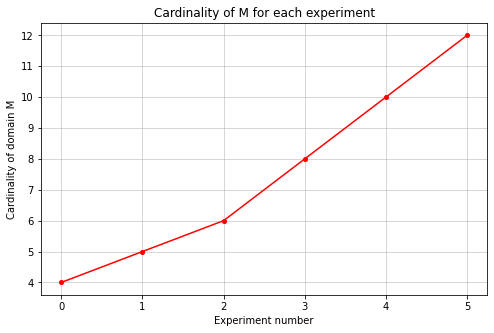

In [ ]:
x = range(len(MlenList))
print("x =",x)
y = MlenList
print("y =",y)
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'ro-', markersize=4)
plt.grid(linewidth = 0.5)
plt.xlabel('Experiment number')
plt.ylabel('Cardinality of domain M')
plt.title('Cardinality of M for each experiment')

plt.savefig('./comparison/images/cardinalityM.png')
plt.show()

---
2. Evoluzione della cardinalità della collezione N in base al valore della cardinalità di M.

In [ ]:
NlenList=[]
for index, givenM in enumerate(MlenList):
  lengthM = givenM
  max_comb = 0
  for k in range(1,lengthM):
    binom = bin(lengthM, k)
    max_comb += binom
  lengthN = round(max_comb/2)
  NlenList.append(lengthN)

x = [4, 5, 6, 8, 10, 12]
y = [7, 15, 31, 127, 511, 2047]


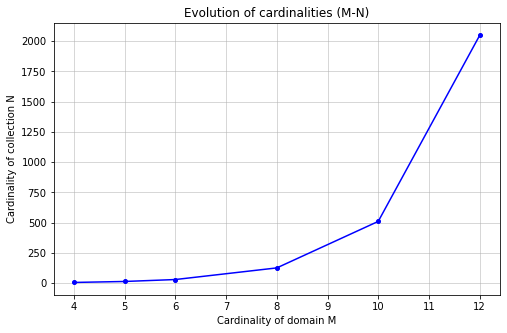

In [ ]:
x = MlenList
print("x =",x)
y = NlenList
print("y =",y)
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'bo-', markersize=4)
plt.grid(linewidth = 0.5)
plt.xlabel('Cardinality of domain M')
plt.ylabel('Cardinality of collection N')
plt.title('Evolution of cardinalities (M-N)')

plt.savefig('./comparison/images/evolMN.png')
plt.show()

---
3. Valore dell'aggregate index al variare dell'esperimento associato.

x = range(0, 6)
y = [0.4643, 0.48, 0.4678, 0.4685, 0.4759, 0.4717]


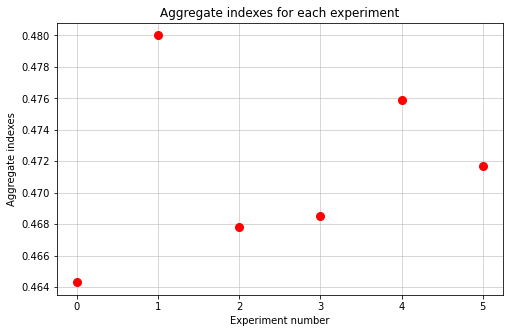

In [ ]:
x = range(len(MlenList))
print("x =",x)
y = aggregate_indexes
print("y =",y)
plt.figure(figsize=(8, 5))
plt.plot(x, y, 'ro', markersize=8)
plt.grid(linewidth = 0.5)
plt.xlabel('Experiment number')
plt.ylabel('Aggregate indexes')
plt.title('Aggregate indexes for each experiment')

plt.savefig('./comparison/images/aggregateIndexes.png')
plt.show()

---
4.  Evoluzione della cardinalità dell'insieme delle partizioni risultante COV al variare dell'esperimento associato.

x = range(0, 6)
y1 = [3, 12, 52, 1245, 56752, 2915956]
y2 = [3, 12, 52, 1245, 56752, 2915956]


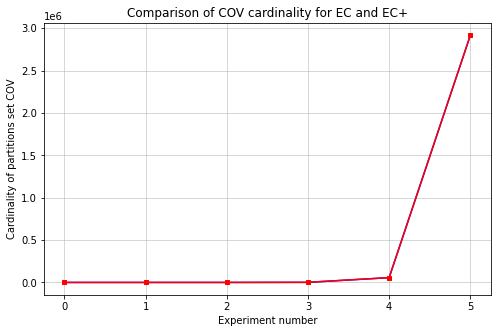

In [ ]:
x = range(len(MlenList))
print("x =", x)
plt.figure(figsize=(8, 5))

y1 = COVlenList_EC
print("y1 =", y1)
plt.plot(x, y1, 'bo-', markersize=4, label = "COV cardinality for EC")
  
y2 = COVlenList_ECplus
print("y2 =", y2)
plt.plot(x, y2, 'rs-', markersize=4, label = "COV cardinality for EC+")

plt.grid(linewidth = 0.5)
plt.xlabel('Experiment number')
plt.ylabel('Cardinality of partitions set COV')
plt.title('Comparison of COV cardinality for EC and EC+')

plt.savefig('./comparison/images/evolCOV.png')
plt.show()

---
5.  Evoluzione della cardinalità dell'insieme delle partizioni risultante COV in base al valore della cardinalità di N.

x = [7, 15, 31, 127, 511, 2047]
y1 = [3, 12, 52, 1245, 56752, 2915956]
y2 = [3, 12, 52, 1245, 56752, 2915956]


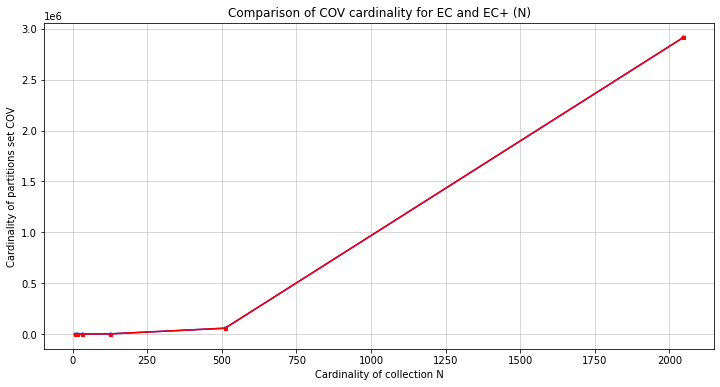

In [ ]:
x = NlenList
print("x =", x)
plt.figure(figsize=(12, 6))

y1 = COVlenList_EC
print("y1 =", y1)
plt.plot(x, y1, 'bo-', markersize=3, label = "COV cardinality for EC")
  
y2 = COVlenList_ECplus
print("y2 =", y2)
plt.plot(x, y2, 'rs-', markersize=3, label = "COV cardinality for EC+")

plt.grid(linewidth = 0.5)
plt.xlabel('Cardinality of collection N')
plt.ylabel('Cardinality of partitions set COV')
plt.title('Comparison of COV cardinality for EC and EC+ (N)')

plt.savefig('./comparison/images/evolNCOV.png')
plt.show()

---
6. Evoluzione del tempo di esecuzione di EC ed EC+ al variare dell'esperimento associato.

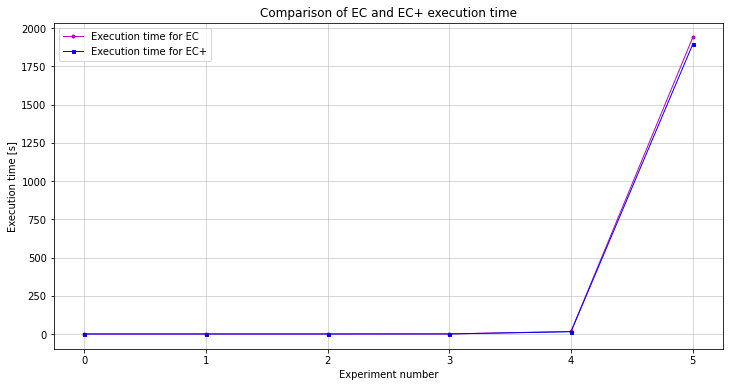

In [ ]:
x = range(len(MlenList))
plt.figure(figsize=(12, 6))

y1 = execution_time_table_EC 
plt.plot(x, y1, 'mo-', markersize=3, linewidth=1, label = "Execution time for EC")
  
y2 = execution_time_table_ECplus 
plt.plot(x, y2, 'bs-', markersize=3, linewidth=1, label = "Execution time for EC+")

plt.grid(linewidth = 0.5)
plt.xlabel('Experiment number')
plt.ylabel('Execution time [s]')
plt.title('Comparison of EC and EC+ execution time')

plt.legend()
plt.savefig('./comparison/images/compareExecution.png')
plt.show()

---
7. Evoluzione della differenza dei tempi di esecuzione di EC ed EC+ al variare dell'esperimento associato.

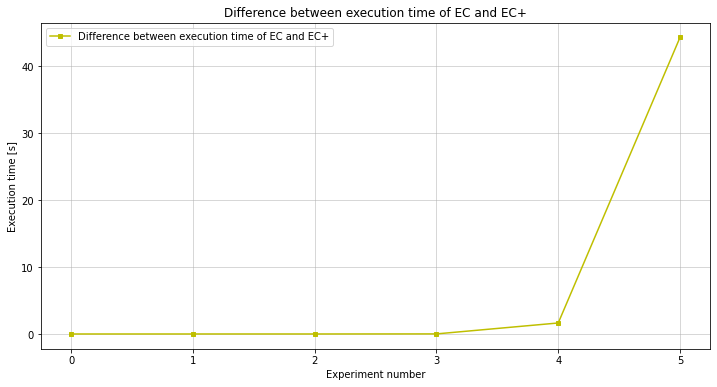

In [ ]:
x = range(len(MlenList))
y_diff = [execution_time_table_EC[i]-execution_time_table_ECplus[i] for i in range(len(execution_time_table_EC))]
plt.figure(figsize=(12, 6))
plt.plot(x, y_diff, 'ys-', markersize=4, label = "Difference between execution time of EC and EC+")
plt.grid(linewidth = 0.5)
plt.xlabel('Experiment number')
plt.ylabel('Execution time [s]')
plt.title('Difference between execution time of EC and EC+')
  
plt.legend()
plt.savefig('./comparison/images/differenceExecution.png')
plt.show()

---
8. Evoluzione del tempo di esecuzione di EC ed EC+ in base alla cardinalità della collezione N.

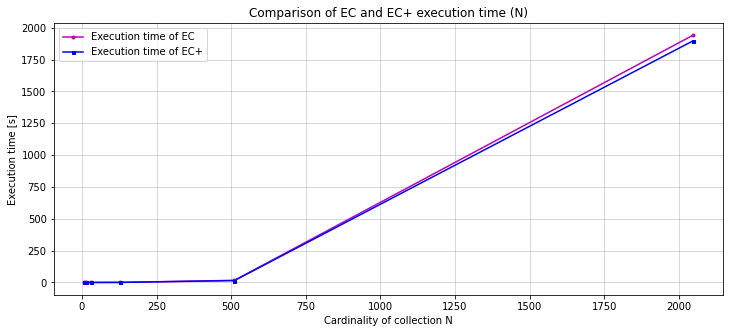

In [ ]:
x = NlenList
plt.figure(figsize=(12, 5))

y1 = execution_time_table_EC 
plt.plot(x, y1, 'mo-', markersize=3, label = "Execution time of EC")
  
y2 = execution_time_table_ECplus 
plt.plot(x, y2, 'bs-', markersize=3, label = "Execution time of EC+")

plt.grid(linewidth = 0.5)
plt.xlabel('Cardinality of collection N')
plt.ylabel('Execution time [s]')
plt.title('Comparison of EC and EC+ execution time (N)')
  
plt.legend()
plt.savefig('./comparison/images/compareExecWithN.png')
plt.show()

---
Download dei risultati ottenuti
---
La cartella *comparison*, contenente le cartelle *input*, *outputEC*, *outputEC+* ed *images*, viene interamente compressa in un file *.zip* e scaricata sul proprio dispositivo.
Il nome di tale file è *experiments.zip*.

In [ ]:
!zip -r ./experiments.zip ./comparison

  adding: comparison/ (stored 0%)
  adding: comparison/images/ (stored 0%)
  adding: comparison/images/evolCOV.png (deflated 9%)
  adding: comparison/images/evolNCOV.png (deflated 9%)
  adding: comparison/images/evolMN.png (deflated 10%)
  adding: comparison/images/compareExecution.png (deflated 11%)
  adding: comparison/images/aggregateIndexes.png (deflated 18%)
  adding: comparison/images/differenceExecution.png (deflated 12%)
  adding: comparison/images/cardinalityM.png (deflated 7%)
  adding: comparison/images/compareExecWithN.png (deflated 9%)
  adding: comparison/comparison_tables/ (stored 0%)
  adding: comparison/comparison_tables/comparison_M0.txt (deflated 72%)
  adding: comparison/comparison_tables/comparison_M3.txt (deflated 70%)
  adding: comparison/comparison_tables/comparison_M2.txt (deflated 71%)
  adding: comparison/comparison_tables/comparison_M5.txt (deflated 69%)
  adding: comparison/comparison_tables/comparison_M4.txt (deflated 70%)
  adding: comparison/comparison_t

In [ ]:
files.download("./experiments.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>